# Gulf of Mexico HYCOM

Compare sea water temperature between ERDDAP datasets and the model.

In [1]:
import ocean_model_skill_assessor as omsa

In [2]:
project_name = "gom_hycom"
key = "temp"

In [3]:
# Model set up information
loc = "http://tds.hycom.org/thredds/dodsC/GOMl0.04/expt_32.5/hrly"
model_name = "model"
kwargs_open = dict(drop_variables=["tau","time_run","surface_temperature_trend"], chunks="auto")

# ERDDAP data catalog set up information
catalog_name = "erddap"
kwargs = dict(server="https://erddap.sensors.ioos.us/erddap", category_search=["standard_name", key])
kwargs_search = dict(min_time="2019-2-1", max_time="2019-2-5",
                     min_lon=-98, max_lon=-96, min_lat=27, max_lat=30)

In [4]:
# create catalog for model
cat_model = omsa.make_catalog(project_name=project_name, 
                              catalog_type="local", 
                              catalog_name=model_name, 
                              kwargs=dict(filenames=loc, skip_entry_metadata=True),
                              kwargs_open=kwargs_open,
                              save_cat=True)

[2023-02-06 14:19:15,673] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:378} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/gom_hycom/model.yaml with 1 entries.


In [5]:
# create catalog for data
cat_data = omsa.make_catalog(project_name=project_name, 
                             catalog_type="erddap", 
                             catalog_name=catalog_name, 
                             kwargs=kwargs,
                             save_cat=True,
                             kwargs_search=kwargs_search,
                             vocab="standard_names")

[2023-02-06 14:19:19,616] {/Users/kthyng/projects/intake-erddap/intake_erddap/erddap_cat.py:246} WARNING - search https://erddap.sensors.ioos.us/erddap/search/advanced.csv?page=1&itemsPerPage=100000&protocol=tabledap&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_surface_temperature&variableName=(ANY)&minLon=-98&maxLon=-96&minLat=27&maxLat=30&minTime=1548979200.0&maxTime=1549324800.0 returned HTTP 404
[2023-02-06 14:19:21,634] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:378} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/gom_hycom/erddap.yaml with 34 entries.


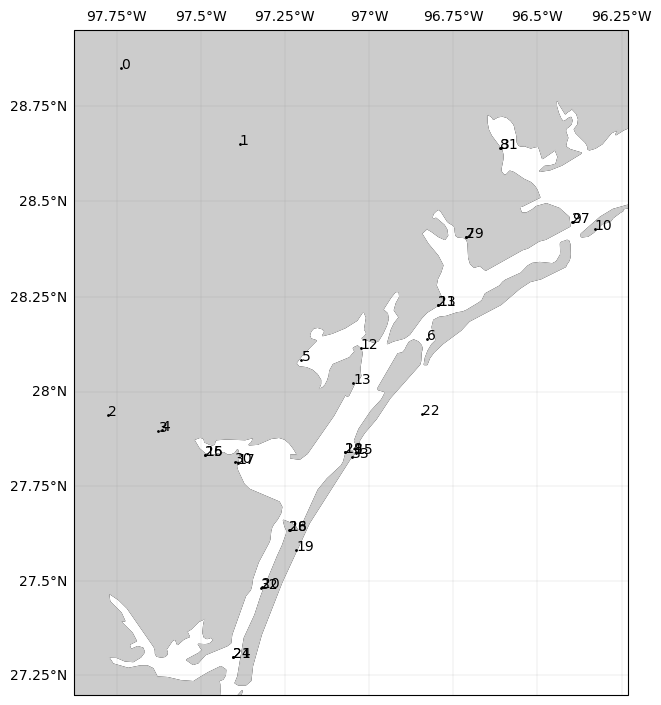

In [6]:
# look at locations of all data found
omsa.plot.map.plot_cat_on_map(catalog=catalog_name, project_name=project_name)

The image shows a map of part of the Texas coastline. Overlaid are black dots, each numbered, to indicate a location of a dataset.

[2023-02-06 14:19:39,311] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:447} INFO - Note that we are using 9 datasets of 34 datasets. This might take awhile.


Error:curl error: Timeout was reached
curl error details: 


[2023-02-06 14:28:31,413] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/utils.py:213} INFO - Generated mask for model using 1 horizontal cross section of model output and searching for nans.
[2023-02-06 14:28:53,785] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:487} INFO - Catalog <Intake catalog: erddap>.
[2023-02-06 14:28:53,903] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:496} INFO - 
source name: gov_usgs_waterdata_08188060 (1 of 9 for catalog <Intake catalog: erddap>.
[2023-02-06 14:28:53,918] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:508} WARNING - Dataset gov_usgs_waterdata_08188060 at lon -97.7371389, lat 28.84869444 not located within model domain. Skipping dataset.

[2023-02-06 14:28:53,918] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:496} INFO - 
source name: gov_usgs_waterdata

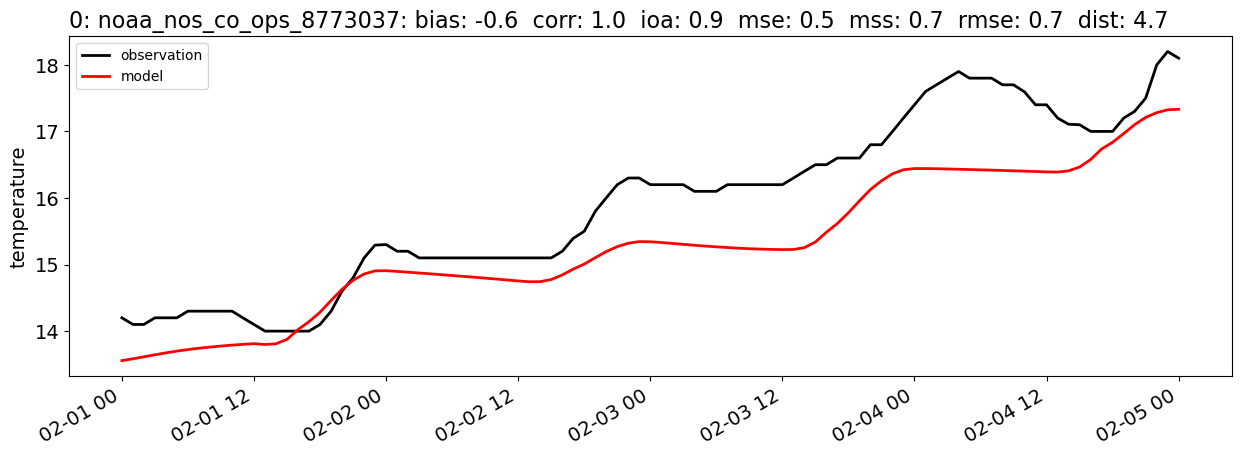

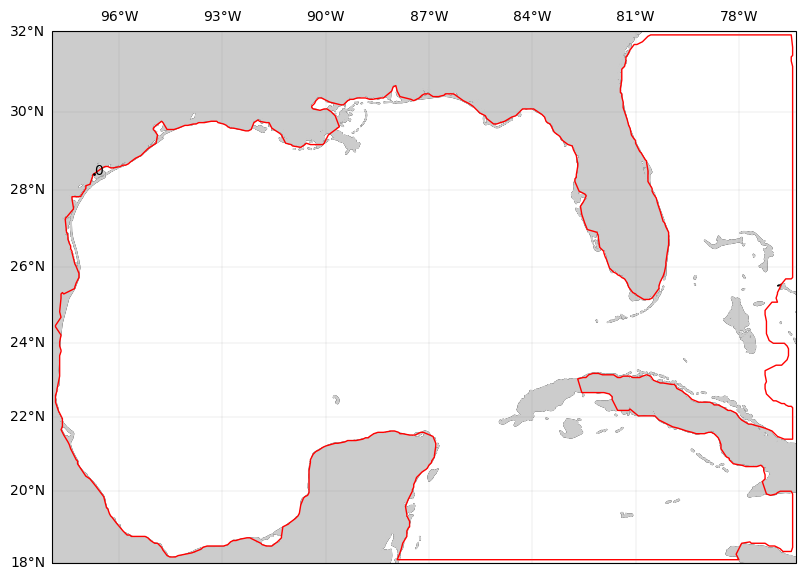

In [7]:
omsa.run(project_name=project_name, catalogs=catalog_name, model_name=model_name,
         vocabs=["general","standard_names"], key_variable=key, ndatasets=9)

A time series is shown comparing the temperatures in dataset "noaa_nos_co_ops_8773037" with nearby model output. The lines are reasonably similar.

Subsequently is shown a map of the Gulf of Mexico with a red outline of the approximate numerical domain and a single black dot with a number "0" showing the location of the dataset that was plotted.